In [15]:
from strym import strymread, strymmap
import pandas as pd

In [25]:
folder = "/home/ivory/CyverseData/JmscslgroupData/PandaData/2021_04_08/"
g = strymmap(csvfile=folder + "2021-04-08-12-26-57_2T3Y1RFV8KC014025_GPS_Messages.csv")
s = strymread(csvfile=folder + "2021-04-08-12-26-57_2T3Y1RFV8KC014025_CAN_Messages.csv")
speed = s.speed()

[2021_04_28_17_03_10] (root) INFO: Reading GPS file /home/ivory/CyverseData/JmscslgroupData/PandaData/2021_04_08/2021-04-08-12-26-57_2T3Y1RFV8KC014025_GPS_Messages.csv
GPS signal first acquired at 2021-04-08 05:26:57:200000


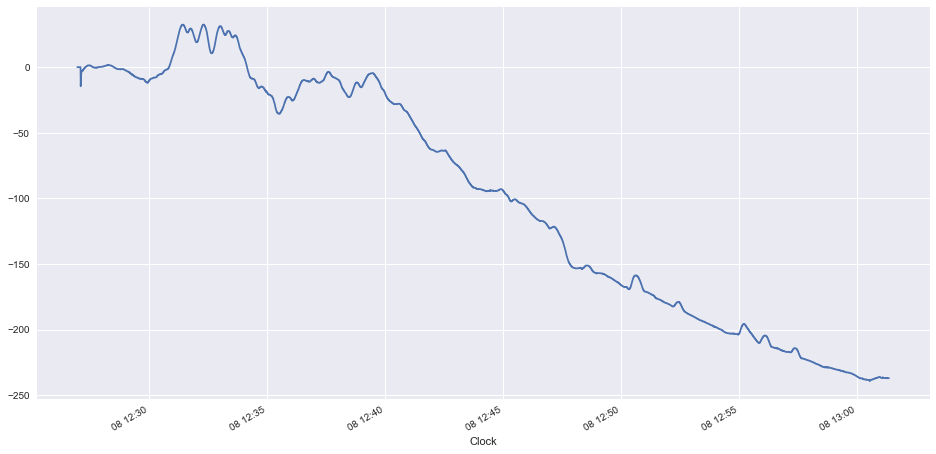

In [26]:
g.dataframe = g.dataframe.iloc[1:]
g.dataframe['alt']  = g.dataframe['Alt'] - g.dataframe['Alt'].iloc[0]
g.dataframe['alt'].plot()
g.dataframe
dist = g.gpsdistance()


In [28]:
import math
def _calcgpsdist(df, sample_time = 0.1):

        distance = 0.0

        dist = []
        for i in range(1,df.shape[0]):
            lat1 = df.iloc[i-1]['Lat']
            long1 = df.iloc[i-1]['Long']
            lat2 = df.iloc[i]['Lat']
            long2 = df.iloc[i]['Long']
            phi_1 = lat1*math.pi/180.0 # in radians
            phi_2 = lat2*math.pi/180.0 # in radians
            delta_phi = phi_1 - phi_2
            lamda_1 = long1
            lamda_2 = long2
            delta_lambda  = (lamda_1 - lamda_2 )*math.pi/180.0

            R = 6371000 # Earth radius in meter

            a = (math.sin(delta_phi/2))**2 + math.cos(phi_1)*math.cos(phi_2)*math.sin(delta_lambda/2)*math.sin(delta_lambda/2)

            c = 2*math.atan2(math.sqrt(a), math.sqrt(1-a))
            great_circle_distance = R*c # in meters
            
            # If distance is too large, then there is a gap between gps data points, I won't include gap distances
            # Here I assumed that in one sampke time interval car cannot go beyond 100 m/s, i.e. too large of a distance between two points
#             if great_circle_distance >= 100*sample_time:
#                 continue
            
            
            distance = distance + great_circle_distance
            dist.append(distance)
        return dist

In [29]:
dist_vector = _calcgpsdist(g.dataframe)

In [30]:
len(dist_vector)

20515

In [31]:
g.dataframe['Gpstime'].iloc[1:]

Clock
2021-04-08 12:27:05.569999872    1.617885e+09
2021-04-08 12:27:05.769999872    1.617885e+09
2021-04-08 12:27:05.900000000    1.617885e+09
2021-04-08 12:27:06.000000000    1.617885e+09
2021-04-08 12:27:06.100000000    1.617885e+09
                                     ...     
2021-04-08 13:01:21.200000000    1.617887e+09
2021-04-08 13:01:21.300000000    1.617887e+09
2021-04-08 13:01:21.400000000    1.617887e+09
2021-04-08 13:01:21.500000000    1.617887e+09
2021-04-08 13:01:21.600000000    1.617887e+09
Name: Gpstime, Length: 20515, dtype: float64

In [32]:
distdf = pd.DataFrame()
distdf['Time'] = g.dataframe['Gpstime'].iloc[1:]
distdf['Message'] = dist_vector



In [33]:
gps_speed = strymread.differentiate(distdf, method='S', verbose=True)
gps_speed = gps_speed.iloc[1:]

In [34]:
gps_speed = strymread.denoise(gps_speed, method = 'MA')

/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



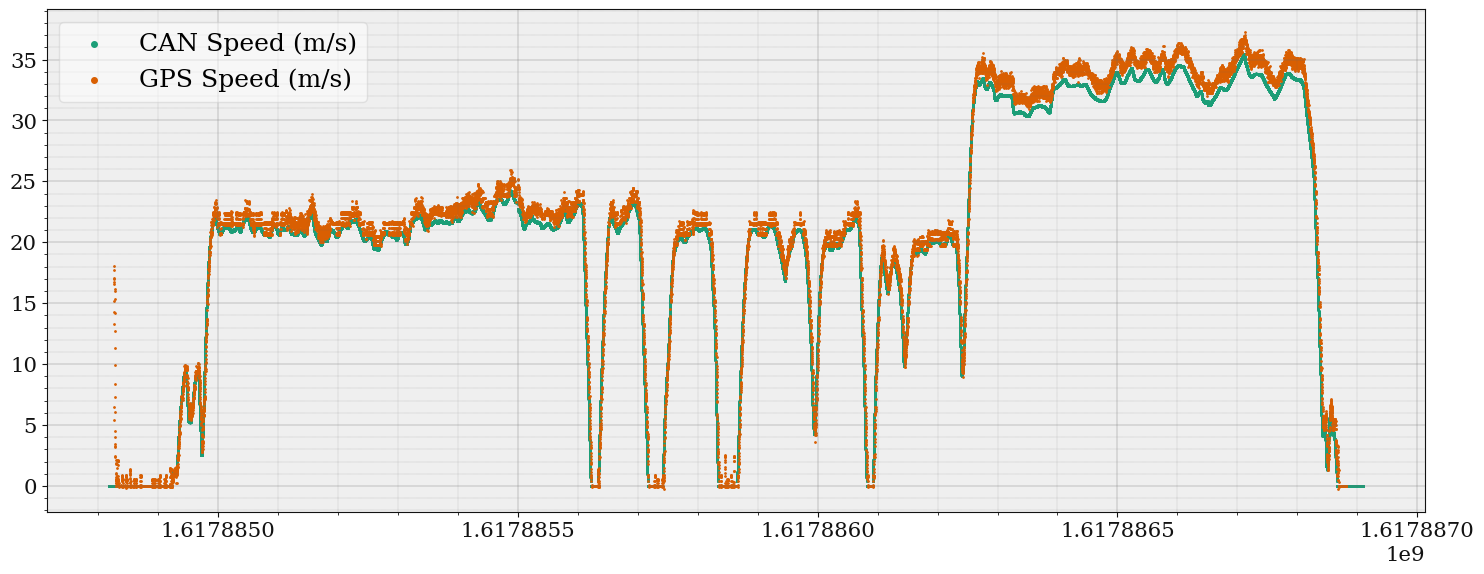

In [35]:
fig,ax= strymread.create_fig(1)
ax[0].scatter(x = speed['Time'], y = speed['Message']*0.277778, s = 1, label = 'CAN Speed (m/s)')

ax[0].scatter(x = 'Time', y = 'Message', data= gps_speed, s = 1, label = 'GPS Speed (m/s)')
ax[0].legend()
fig.show()

In [40]:
#shift = strymread.time_shift(gps_speed,speed )

In [41]:
#shift

In [42]:
# fig,ax= strymread.create_fig(1)
# ax[0].scatter(x = speed['Time'], y = speed['Message']*0.277778, s = 1, label = 'CAN Speed (m/s)')

# ax[0].scatter(x = gps_speed['Time']+shift, y = gps_speed['Message'], s = 1, label = 'GPS Speed (m/s)')
# ax[0].legend()
# fig.show()